In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Ley de Zipf

In [11]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset = pd.read_csv('TweetsEtiquetadosEmociones.txt', sep='\t',encoding='utf-8')
f = open('TweetsEtiquetadosEmociones.txt', 'r',encoding='utf-8')

## 1era Forma Contar - Con los tweets etiquetados

In [18]:
f = open ('TweetsEtiquetadosEmociones.txt','r', encoding='utf-8')
mensaje = f.read()
print(mensaje)
f.close()


﻿1	"El Atlético resignado a perder HASHTAG 😔  https://t.co/AiaaGdxmQO"	sadness 
2	"Leer proporciona una mejor visión del mundo 🤓  ¡Feliz HASHTAG y HASHTAG! 📖 https://t.co/LRUdAIRTbN"	joy 
3	Amo a Arya Stark por encima de todas las cosas 😍😍😍#gameofthrones HASHTAG	joy 
4	Gracias HASHTAG es increíble que una niña logre liderar tan imperativa movilización y supere a cualquier adulto en nivel de conciencia. Vergüenza deberíamos sentir los demás 😓#CambioClimático HASHTAG HASHTAG HASHTAG 🙏🌎💚https://t.co/HRFPuB7oc9	others 
5	Solo siento que hayamos perdido 24 escaños de cordura HASHTAG	sadness 
6	"Solo con ver con la intensidad que agitan las banderas se ve que no han quedado satisfechos los de USER Sinceramente me alegro muchísimo. HASHTAG HASHTAG https://t.co/Au7zuC1KWp"	joy 
7	"¡Una vez más uno de los mejores jugadores de la historia! 🇦🇷 Leo Messi al 75' y al 82' en HASHTAG 🔵🔴 ¿Se acabó la serie? 🏆 https://t.co/xivFajGEvz"	joy 
8	HASHTAG espero que no se quejen de los injusto que es el futb

In [20]:
f = open ('TweetsEtiquetadosEmociones.txt','r', encoding='utf-8')
file_to_string = f.read()

In [32]:
import re
import string 
from operator import itemgetter    
frequency = {}
words = re.findall(r'(b[A-Za-z][a-z]{2,9}b)', file_to_string)

In [33]:
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [34]:
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    print (key, value)

bsorb 1
bajab 1
brillab 1
bisab 1
bustib 1
bfuwowb 1
bwownriwpdeb 1
bernab 1
bominab 1
bitab 1
bergab 1
busab 1
barrab 1
batib 1


In [37]:

 
frequency = {}
open_file = open('TweetsEtiquetadosEmociones.txt','r', encoding='utf-8')
file_to_string = open_file.read()
words = re.findall(r'(b[A-Za-z][a-z]{2,9}b)', file_to_string)
 
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    print (key, value)

bsorb 1
bajab 1
brillab 1
bisab 1
bustib 1
bfuwowb 1
bwownriwpdeb 1
bernab 1
bominab 1
bitab 1
bergab 1
busab 1
barrab 1
batib 1


## 2da Forma Contar - Con los tweets etiquetados

In [154]:
names = ['Id', 'tweet', 'polaridad']
palabras = pd.read_csv('TweetsEtiquetadosPolaridad.txt', sep='\t',names=names)
palabras.head(5)

,Id,tweet,polaridad
0,819337926026862593,Antojo de empanada colombiana,NEU
1,817464156756574208,Me volvieron a dejar sola,N
2,819237267181080576,@ManuTonic Buenotes diotas. Un gran abrazo,P
3,817486639681466371,cual es su mejor recuerdo juntos? #BntResponde,NEU
4,819406610636357632,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NEU


In [155]:
names = ['Id', 'tweet', 'emocion']
emociones = pd.read_csv('TweetsEtiquetadosEmociones.txt', sep='\t',names=names)
emociones.head(5)

,Id,tweet,emocion
0,1,El Atlético resignado a perder HASHTAG 😔 http...,sadness
1,2,Leer proporciona una mejor visión del mundo 🤓 ...,joy
2,3,Amo a Arya Stark por encima de todas las cosas...,joy
3,4,Gracias HASHTAG es increíble que una niña logr...,others
4,5,Solo siento que hayamos perdido 24 escaños de ...,sadness


In [156]:
palabras['tweet2'] = palabras.tweet.str.strip().str.split('[\W_]+')

In [157]:
rows = list()
for row in palabras[['tweet2']].iterrows():
    r = row[1]
    for word in r.tweet2:
        rows.append((word))

tweet2 = pd.DataFrame(rows, columns=['tweet2'])
tweet2.head()

,tweet2
0,Antojo
1,de
2,empanada
3,colombiana
4,Me


In [158]:
tweet2 = tweet2[tweet2.tweet2.str.len() > 0]
tweet2['tweet2'] = tweet2.tweet2.str.lower()
tweet2.head()

,tweet2
0,antojo
1,de
2,empanada
3,colombiana
4,me


In [159]:
counts = tweet2\
    .tweet2.value_counts()\
    .to_frame()\
    .rename(columns={'tweet2':'n_w'})
counts.head(15)

,n_w
que,4099
de,3699
y,3152
no,2705
a,2679
la,2462
me,2286
el,2042
en,1950
es,1684


In [160]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [161]:
for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [162]:
counts.head(20)

,n_w
si,682
hoy,330
q,325
mejor,306
quiero,302
gracias,294
día,291
bueno,288
ser,259
bien,258


In [163]:
top_500 = counts.head(500) 
#top_500

In [174]:
top_35 = counts.head(35)
top_35

,n_w
si,682
hoy,330
q,325
mejor,306
quiero,302
gracias,294
día,291
bueno,288
ser,259
bien,258


In [175]:
top_35['palabras'] = counts.head(35)
top_35

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,n_w,palabras
si,682,682
hoy,330,330
q,325,325
mejor,306,306
quiero,302,302
gracias,294,294
día,291,291
bueno,288,288
ser,259,259
bien,258,258


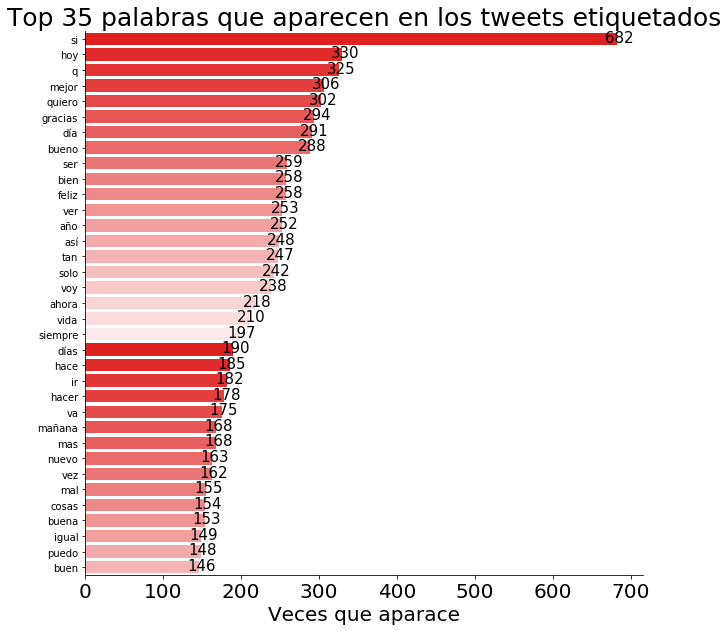

In [176]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x="n_w", y=top_35.index, data=top_35, palette=sns.light_palette("red", n_colors=20, reverse=True))
plt.ylabel("")
plt.xlabel('Veces que aparace', fontsize=20)
plt.title('Top 35 palabras que aparecen en los tweets etiquetados', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('palabras_populares.jpg')
plt.plot();

In [197]:
top_five_words = counts.head(500).index
top_five_words

Index(['si', 'hoy', 'q', 'mejor', 'quiero', 'gracias', 'día', 'bueno', 'ser',
       'bien',
       ...
       'pueda', 'juro', 'importa', 'videos', 'podemos', 'dado', 'tío',
       'camino', 'internet', 'youtube'],
      dtype='object', length=500)

In [198]:

#pip install wordcloud
#conda install -c conda-forge wordcloudimport re
from PIL import Image
from wordcloud import WordCloud
from collections import Counter

In [204]:
comment_words = ' '
for val in counts.head(100).index:       
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split()  
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  

In [205]:
trump_mask = np.array(Image.open("silhouette-heart.jpg"))

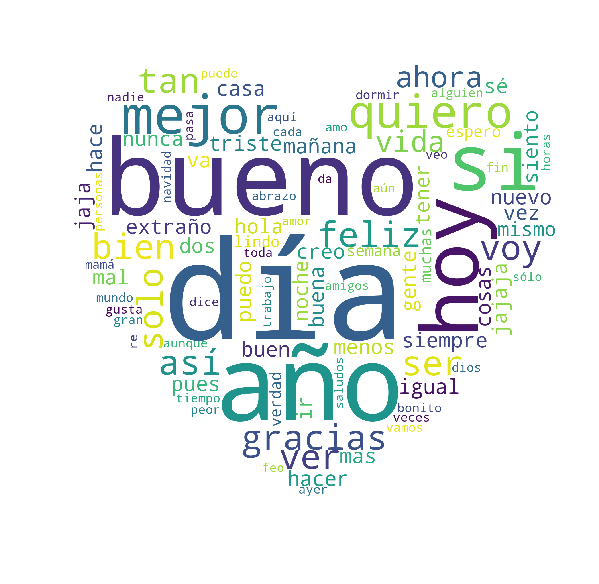

In [206]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                mask=trump_mask,
                min_font_size = 10).generate(comment_words)  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

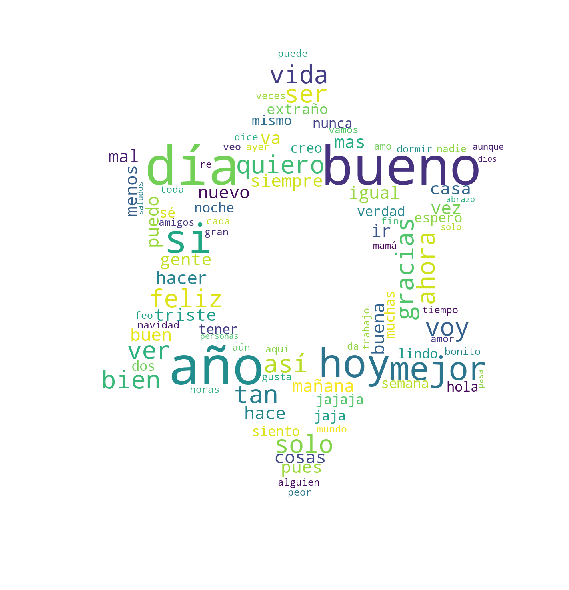

In [207]:
trump_mask = np.array(Image.open("estrelladavid.jpg"))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                mask=trump_mask,
                min_font_size = 10).generate(comment_words)  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

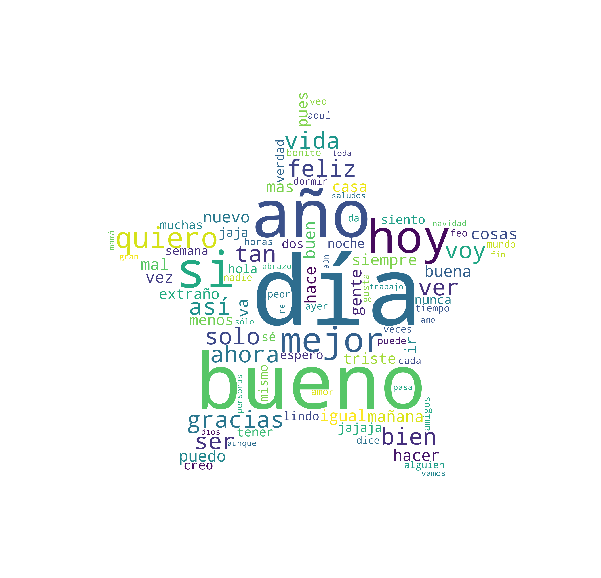

In [208]:
trump_mask = np.array(Image.open("star.jpg"))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                mask=trump_mask,
                min_font_size = 10).generate(comment_words)  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()